![](../../CintillaTecNM-ITD.png)

<div style = "Text-align: center">
    <h2> Análisis de datos masivos </h2>
    <h3> Evaluación de los errores de ajuste </h3><br>
    <h3> Nombre docente </h3>
    <h4> Jose Gabriel Rodriguez Rivas <h4>
    <h3> Nombre Alumno </h3>
    <h4> Misael Omar Vargas Ochoa <h4>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import numpy and pandas
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [2]:
# Import the file stores-dist.txt
salesDist = pd.read_csv('./stores-dist.txt')

# Change the column headings
salesDist.columns = ['district','sales','stores']

# Verify the imported data
salesDist.head()

,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


In [3]:
# Drop the district column.
sales = salesDist.drop('district',axis=1)

# Verify that the district column has been dropped.
sales.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


In [4]:
#dependent variable for y axis
y = sales.sales 
#independent variable for x axis
x = sales.stores

In [5]:
order = 1
p = np.poly1d(np.polyfit(x, y ,order))

print('The array p(x) stores the calculated y value from the polynomial model for each x value,\n\n{}.'.format(p(x)))
print('\nThe vector of coefficients p describes this regression model:\n{}'.format(p))
print('\nThe zeroth order term (y-intercept or b) is stored in p[0]: {}.'.format(p[0]))
print('\nThe first order term (slope or m) is stored in p[1]: {}.'.format(p[1]))

The array p(x) stores the calculated y value from the polynomial model for each x value,

[169.93468442 134.14759895  26.78634257 527.80553905 384.65719719
 420.44428266 205.72176988 134.14759895  26.78634257 277.29594081
 527.80553905 313.08302627 456.23136812  62.57342803 169.93468442
 205.72176988 420.44428266  98.36051349 313.08302627 527.80553905
 563.59262451  62.57342803 134.14759895 348.87011173 384.65719719
 563.59262451 277.29594081].

The vector of coefficients p describes this regression model:
 
-35.79 x + 599.4

The zeroth order term (y-intercept or b) is stored in p[0]: 599.3797099726614.

The first order term (slope or m) is stored in p[1]: -35.787085462974005.


In [6]:
from sklearn.metrics import r2_score
r2 = r2_score(y, p(x))
r2

0.83217523508888

In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, p(x))
mse

5961.386465941158

In [8]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, p(x))
mae

61.2232611786873

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

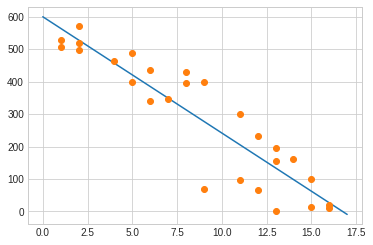

In [10]:
fig = plt.figure()
ax = plt.axes()

x1 = range(18)
y1 = p(x1)
ax.plot(x1, y1);
ax.plot(sales.stores, sales.sales, 'o') 